<a href="https://colab.research.google.com/github/farima-trb/MMU-Courseworks/blob/main/Copy_of_AML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to the note book :

https://colab.research.google.com/drive/11yY6F3bwV0z7_v2YnixsiOFy0HRV526S?usp=sharing

# <font face="Arial" size=5 color='#9f647a'> Installing Packages
<font face="Arial" size=3 color='#9f647a'> <font>

In [ ]:
pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 54.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install shap

In [ ]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict, KFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import time
import shap
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import Ridge

# <font face="Arial" size=5 color='#9f647a'> Loading Dataset
<font face="Arial" size=3 color='#9f647a'> <font>

In [ ]:
df.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

# <font face="Arial" size=5 color='#9f647a'> Preliminary Task
<font face="Arial" size=3 color='#9f647a'> <font>

# <font face="Arial" size=4 color='#8496b3'> 1. Data Description and Pre-Processing <font face="Arial" size=3 color='#8496b3'> <font> <font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
""""
reg_code and year_of_registration
"""""

df.loc[(df['year_of_registration'].isnull()) & (df['reg_code'].isnull()) & (df['vehicle_condition']=='NEW')] = df.loc[(df['year_of_registration'].isnull()) & (df['reg_code'].isnull()) & (df['vehicle_condition']=='NEW'), :].fillna({'year_of_registration':(df["year_of_registration"].max())+1})

import random

# Mapping dictionary
year_to_reg_codes = {
    1963.0: ['A'], 1964.0: ['B'], 1965.0: ['C'], 1966.0: ['D'], 1967.0: ['E', 'F'],
    1968.0: ['G'], 1969.0: ['H'], 1970.0: ['J'], 1971.0: ['K'], 1972.0: ['L'],
    1973.0: ['M'], 1974.0: ['N'], 1975.0: ['P'], 1976.0: ['R'], 1977.0: ['S'],
    1978.0: ['T'], 1979.0: ['V'], 1980.0: ['W'], 1981.0: ['X'], 1982.0: ['Y'],
    1983.0: ['A'], 1984.0: ['B'], 1985.0: ['C'], 1986.0: ['D'], 1987.0: ['E'],
    1988.0: ['F'], 1989.0: ['G'], 1990.0: ['H'], 1991.0: ['J'], 1992.0: ['K'],
    1993.0: ['L'], 1994.0: ['M'], 1995.0: ['N'], 1996.0: ['P'], 1997.0: ['R'],
    1998.0: ['S'], 1999.0: ['T', 'V'], 2000.0: ['V', 'X'],
    2001.0: ['Y', '51'], 2002.0: ['2', '52'], 2003.0: ['3', '53'], 2004.0: ['4', '54'],
    2005.0: ['5', '55'], 2006.0: ['6', '56'], 2007.0: ['7', '57'], 2008.0: ['8', '58'],
    2009.0: ['9', '59'], 2010.0: ['10', '60'], 2011.0: ['11', '61'], 2012.0: ['12', '62'],
    2013.0: ['13', '63'], 2014.0: ['14', '64'], 2015.0: ['15', '65'], 2016.0: ['16', '66'],
    2017.0: ['17', '67'], 2018.0: ['18', '68'], 2019.0: ['19', '69'], 2020.0: ['20', '70'], 2021.0: ['21', '71']
}

# Reverse mapping for reg_code -> years
reg_code_to_year = {code: year for year, codes in year_to_reg_codes.items() for code in codes}

# Function to correct the values
def correct_values(row):
    year = row['year_of_registration']
    reg_code = row['reg_code']
    mileage = row['mileage']

    # Step 1: Use year_of_registration to guess reg_code
    if pd.notnull(year) and year in year_to_reg_codes:
        guessed_reg_code = random.choice(year_to_reg_codes[year])  # Pick a valid reg_code for the year
        return year, guessed_reg_code

    # Step 2: Use reg_code to guess year_of_registration
    if pd.notnull(reg_code) and reg_code in reg_code_to_year:
        guessed_year = reg_code_to_year[reg_code]
        return guessed_year, reg_code

    return year, reg_code

# Applying the function to correct the values
df[['year_of_registration', 'reg_code']] = df.apply(lambda row: pd.Series(correct_values(row)), axis=1)

df.drop(df.loc[df["year_of_registration"]<1963].index, inplace=True)

# Defining the transformation function based on grouping

def fill_missing_year(grouped_df, df):

    return grouped_df['year_of_registration'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['year_of_registration'].mode()[0])
    )

# Apply the group-based imputation function
df['year_of_registration'] = fill_missing_year(
    df.groupby(['standard_make', 'standard_model']),df
)

# Apply the function to correct the values
df[['year_of_registration', 'reg_code']] = df.apply(lambda row: pd.Series(correct_values(row)), axis=1)


""""
fuel_type
"""""

# Calculate the global mode of fuel_type for fallback
global_mode_fuel_type = df['fuel_type'].mode()[0]
# which is Petrol

df['fuel_type'] = df.groupby(['standard_make', 'standard_model'])['fuel_type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode_fuel_type)
)


""""
mileage
"""""
# Group by 'standard_make', 'standard_model', and 'fuel_type'
def process_mileage(group):
    # Fill Missing Values with Group Median
    median = group['mileage'].median()
    group['mileage'] = group['mileage'].fillna(median)

    # Capping Outliers by Using IQR
    Q1 = group['mileage'].quantile(0.25)
    Q3 = group['mileage'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above the upper bound
    group['mileage'] = group['mileage'].apply(lambda x: min(x, upper_bound))

    return group

# Apply the function to each group
df = df.groupby(['standard_make', 'standard_model', 'fuel_type']).apply(process_mileage).reset_index(drop=True)

""""
standard_colour
"""""

# Global mode for fallback
global_mode_colour = df['standard_colour'].mode()[0]
# which is Black

# Fill missing 'standard_colour' based on mode within groups
df['standard_colour'] = df.groupby(['standard_make', 'standard_model'])['standard_colour'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode_colour)
)

""""
body_type
"""""

# Calculate the global mode of fuel_type for fallback
global_mode_body_type = df['body_type'].mode()[0]
# which is Hatchback

df['body_type'] = df.groupby(['standard_make', 'standard_model'])['body_type'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode_body_type)
)


<ipython-input-11-ef01840f81d9>:103: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['standard_make', 'standard_model', 'fuel_type']).apply(process_mileage).reset_index(drop=True)


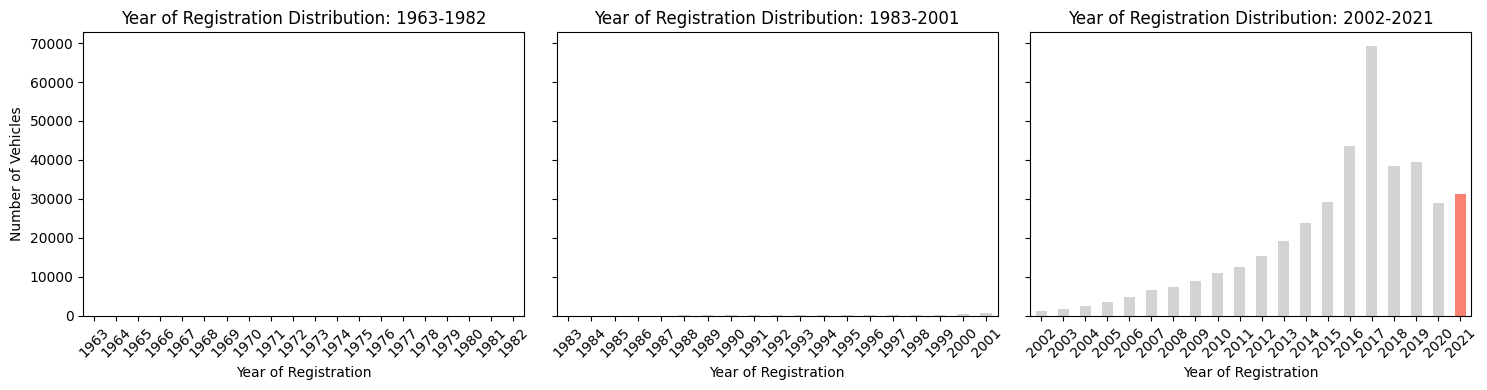

In [ ]:
# Ensure numeric year_of_registration for filtering and plotting
df['year_of_registration'] = pd.to_numeric(df['year_of_registration'], errors='coerce')

# Prepare data subsets for year_of_registration distribution in each time frame
year_distribution_data = {}
time_frames = {
    "1963-1982": (1963, 1982),
    "1983-2001": (1983, 2001),
    "2002-2021": (2002, 2021),
}

for frame, (start, end) in time_frames.items():
    subset = df[(df['year_of_registration'] >= start) & (df['year_of_registration'] <= end)]
    year_distribution_data[frame] = subset['year_of_registration'].value_counts().sort_index()

# Create a single row with 3 subplots for year_of_registration distribution and highlight 2021
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, (frame, year_distribution) in zip(axes, year_distribution_data.items()):
    # Default all bars to light grey
    colors = ['lightgrey'] * len(year_distribution)

    # Highlight the bar for the year 2021 if it exists in the current distribution
    if 2021 in year_distribution.index:
        colors[year_distribution.index.get_loc(2021)] = 'salmon'

    # Plot the bar chart
    year_distribution.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f"Year of Registration Distribution: {frame}")
    ax.set_xlabel("Year of Registration")
    ax.set_ylabel("Number of Vehicles")
    ax.set_xticks(range(len(year_distribution)))
    ax.set_xticklabels(year_distribution.index.astype(int), rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401961 entries, 0 to 401960
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401961 non-null  int64  
 1   mileage                401961 non-null  float64
 2   reg_code               401961 non-null  object 
 3   standard_colour        401961 non-null  object 
 4   standard_make          401961 non-null  object 
 5   standard_model         401961 non-null  object 
 6   vehicle_condition      401961 non-null  object 
 7   year_of_registration   401961 non-null  float64
 8   price                  401961 non-null  int64  
 9   body_type              401961 non-null  object 
 10  crossover_car_and_van  401961 non-null  bool   
 11  fuel_type              401961 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
df.head(3)

public_reference  mileage reg_code standard_colour standard_make  \
0   202002297861368    500.0       67           White            AC   
1   201905178037632    700.0       67           White            AC   
2   201910243647117    700.0       67           Black            AC   

  standard_model vehicle_condition  year_of_registration   price    body_type  \
0          Cobra              USED                2017.0  129500  Convertible   
1          Cobra              USED                2017.0   94950  Convertible   
2          Cobra              USED                2017.0   94950  Convertible   

   crossover_car_and_van fuel_type  
0                  False    Petrol  
1                  False    Petrol  
2                  False    Petrol

In [ ]:
# Data Transformation -> log transform on price and mileage

In [ ]:
# Data Transformation -> log transform
df['log_price'] = np.log1p(df['price'])

In [ ]:
df['log_mileage'] = np.log1p(df['mileage'])

In [ ]:
df.head(3)

public_reference  mileage reg_code standard_colour standard_make  \
0   202002297861368    500.0       67           White            AC   
1   201905178037632    700.0       67           White            AC   
2   201910243647117    700.0       67           Black            AC   

  standard_model vehicle_condition  year_of_registration   price    body_type  \
0          Cobra              USED                2017.0  129500  Convertible   
1          Cobra              USED                2017.0   94950  Convertible   
2          Cobra              USED                2017.0   94950  Convertible   

   crossover_car_and_van fuel_type  log_price  log_mileage  
0                  False    Petrol  11.771444     6.216606  
1                  False    Petrol  11.461116     6.552508  
2                  False    Petrol  11.461116     6.552508

In [ ]:
df2 = df.copy()

In [ ]:
df2. drop(columns=['public_reference', 'reg_code', 'mileage','price'], inplace=True)

In [ ]:
df2.columns

Index(['standard_colour', 'standard_make', 'standard_model',
       'vehicle_condition', 'year_of_registration', 'body_type',
       'crossover_car_and_van', 'fuel_type', 'log_price', 'log_mileage'],
      dtype='object')

In [ ]:
# Encoding -> OneHot and Target encoding

# Assign 1 to 'NEW' vehicles and 0 to 'USED' vehicles in the 'vehicle_condition' column
df2['vehicle_condition_NEW'] = df2['vehicle_condition'].apply(lambda x: 0 if x == 'USED' else 1)

# Apply One-Hot Encoding using earlier approach (only for 'crossover_car_and_van')
oneHot_encoded_features = ['crossover_car_and_van']  # Only include the remaining feature for OneHotEncoding
oneHot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply One-Hot Encoding for the remaining feature
X_oneHot = oneHot_encoder.fit_transform(df2[oneHot_encoded_features])

# Convert one-hot encoded features into DataFrames
X_oneHot_df = pd.DataFrame(X_oneHot, columns=oneHot_encoder.get_feature_names_out(oneHot_encoded_features), index=df2.index)

# Concatenate the one-hot encoded features back with the dataset
df2 = pd.concat([df2.drop(columns=oneHot_encoded_features), X_oneHot_df], axis=1)

df2. drop(columns=['vehicle_condition'], inplace=True)

In [ ]:
df2.head(3)

standard_colour standard_make standard_model  year_of_registration  \
0           White            AC          Cobra                2017.0   
1           White            AC          Cobra                2017.0   
2           Black            AC          Cobra                2017.0   

     body_type fuel_type  log_price  log_mileage  vehicle_condition_NEW  \
0  Convertible    Petrol  11.771444     6.216606                      0   
1  Convertible    Petrol  11.461116     6.552508                      0   
2  Convertible    Petrol  11.461116     6.552508                      0   

   crossover_car_and_van_True  
0                         0.0  
1                         0.0  
2                         0.0

In [ ]:
# Sample 10,000 rows (or adjust as needed) from the full preprocessed set
sample_df = df2.sample(n=10000, random_state=42)

In [ ]:
train_data, test_data = train_test_split(sample_df, test_size=0.2, random_state=42)

In [ ]:
# Separate features and target
X_train = train_data.drop(columns=['log_price'])
y_train = train_data['log_price']
X_test = test_data.drop(columns=['log_price'])
y_test = test_data['log_price']

In [ ]:
# Encoding

features_to_encode = ['standard_colour', 'fuel_type', 'standard_make', 'standard_model', 'body_type']
target_encoder = TargetEncoder(cols=features_to_encode, smoothing=1.0)
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

In [ ]:
# Scaling
numeric_columns = ['log_mileage', 'year_of_registration', 'standard_colour',
                   'fuel_type', 'standard_make', 'standard_model', 'body_type']

scaler = StandardScaler()
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train_scaled[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test_scaled[numeric_columns])


In [ ]:
X_train_scaled.shape

(8000, 9)

In [ ]:
X_train_scaled.head(3)

standard_colour  standard_make  standard_model  year_of_registration  \
273990        -0.350525       0.026954        0.084658             -3.086832   
358999         0.511554      -0.261678       -0.033493              0.339840   
262205         0.780283      -0.927408        0.013517              1.025175   

        body_type  fuel_type  log_mileage  vehicle_condition_NEW  \
273990   0.628599   0.394023     0.858319                      0   
358999  -1.074898   0.394023     0.158452                      0   
262205   1.094486  -0.658435    -0.100673                      0   

        crossover_car_and_van_True  
273990                         0.0  
358999                         0.0  
262205                         0.0

# <font face="Arial" size=5 color='#9f647a'> Part I
<font face="Arial" size=3 color='#9f647a'> <font>

# <font face="Arial" size=4 color='#8496b3'> 2. Automated Feature Selection (RFECV) <font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
model = LinearRegression()
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2', n_jobs=-1)
rfecv.fit(X_train_scaled, y_train)

selected_features = X_train_scaled.columns[rfecv.support_]
selected_features

Index(['standard_colour', 'standard_make', 'standard_model',
       'year_of_registration', 'body_type', 'fuel_type', 'log_mileage',
       'vehicle_condition_NEW', 'crossover_car_and_van_True'],
      dtype='object')

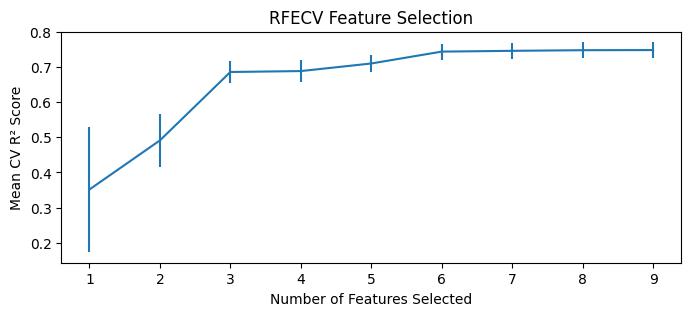

In [ ]:
# Plot performance
plt.figure(figsize=(8, 3))
plt.errorbar(
    range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.xlabel("Number of Features Selected")
plt.ylabel("Mean CV R² Score")
plt.title("RFECV Feature Selection")
plt.show()

In [ ]:
import pandas as pd

# Create DataFrame from RFECV results
rfecv_results = pd.DataFrame({
    'Number of Features Selected': range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
    'Mean CV R² Score': rfecv.cv_results_["mean_test_score"],
    'Standard Deviation': rfecv.cv_results_["std_test_score"]
})

# Optional: round for clean presentation
rfecv_results = rfecv_results.round(4)

# Display the table
rfecv_results

Number of Features Selected  Mean CV R² Score  Standard Deviation
0                            1            0.3517              0.1784
1                            2            0.4912              0.0752
2                            3            0.6858              0.0316
3                            4            0.6884              0.0307
4                            5            0.7100              0.0242
5                            6            0.7438              0.0228
6                            7            0.7460              0.0225
7                            8            0.7478              0.0224
8                            9            0.7481              0.0223

In [ ]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
feature_ranks = pd.Series(rfecv.ranking_, index=X_train_scaled.columns)
feature_ranks.sort_values()

standard_colour               1
standard_make                 1
standard_model                1
year_of_registration          1
body_type                     1
fuel_type                     1
log_mileage                   1
vehicle_condition_NEW         1
crossover_car_and_van_True    1
dtype: int64

# <font face="Arial" size=4 color='#8496b3'> 3. Tree Ensembles <font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
# --- Random Forest ---
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)

start = time.time()
rf_grid.fit(X_train_scaled, y_train)
end = time.time()

rf_time = end - start

best_rf = rf_grid.best_estimator_
rf_preds = best_rf.predict(X_test_scaled)


In [ ]:
print("Random Forest")
print("Best Params:", rf_grid.best_params_)
print("R² Test Score:", r2_score(y_test, rf_preds))
print("MAE Test:", mean_absolute_error(y_test, rf_preds))

print(f"\nTraining time: {rf_time:.2f} seconds")

Random Forest
Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
R² Test Score: 0.8820153421031787
MAE Test: 0.18615069839385084

Training time: 174.71 seconds


In [ ]:
print("Train R²:", best_rf.score(X_train_scaled, y_train))
print("Test  R²:", best_rf.score(X_test_scaled, y_test))

Train R²: 0.9876055309321063
Test  R²: 0.8820153421031787


In [ ]:
best_rf

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
# --- Gradient Boosting ---
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
}
gb = GradientBoostingRegressor(random_state=42)

gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='r2', n_jobs=-1)

start = time.time()
gb_grid.fit(X_train_scaled, y_train)
end = time.time()

gb_time = end - start

best_gb = gb_grid.best_estimator_
gb_preds = best_gb.predict(X_test_scaled)

In [ ]:
print("\nGradient Boosting")
print("Best Params:", gb_grid.best_params_)
print("R² Test Score:", r2_score(y_test, gb_preds))
print("MAE Test:", mean_absolute_error(y_test, gb_preds))

print(f"\nTraining time: {gb_time:.2f} seconds")


Gradient Boosting
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
R² Test Score: 0.9111622701782363
MAE Test: 0.17048728765248614

Training time: 48.99 seconds


In [ ]:
print("Train R²:", best_gb.score(X_train_scaled, y_train))
print("Test  R²:", best_gb.score(X_test_scaled, y_test))

Train R²: 0.9623385223837213
Test  R²: 0.9111622701782363


In [ ]:
# print("Train R²:", best_gb.score(X_train_scaled, y_train))
print("Test  R²:", best_gb.score(X_test_scaled, y_test))

Test  R²: 0.9111622701782363


In [ ]:
best_gb

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [ ]:
# 1) Compute train predictions and MAE
rf_train_pred = best_rf.predict(X_train_scaled)
rf_train_mae  = mean_absolute_error(y_train, rf_train_pred)

gb_train_pred = best_gb.predict(X_train_scaled)
gb_train_mae  = mean_absolute_error(y_train, gb_train_pred)

# 2) Compute test predictions
rf_test_pred  = best_rf.predict(X_test_scaled)
gb_test_pred  = best_gb.predict(X_test_scaled)

# 3) Assemble metrics into a summary table
rows = [
    {
        "Model":             "Random Forest",
        "Training Time (s)": round(rf_time, 2),
        "Train R²":          round(r2_score(y_train, rf_train_pred), 4),
        "Test R²":           round(r2_score(y_test,  rf_test_pred), 4),
        "Train MAE":         round(rf_train_mae, 4),
        "Test MAE":          round(mean_absolute_error(y_test, rf_test_pred), 4),
        "R² Test Score":     round(r2_score(y_test, rf_preds), 4)
    },
    {
        "Model":             "Gradient Boosting",
        "Training Time (s)": round(gb_time, 2),
        "Train R²":          round(r2_score(y_train, gb_train_pred), 4),
        "Test R²":           round(r2_score(y_test,  gb_test_pred), 4),
        "Train MAE":         round(gb_train_mae, 4),
        "Test MAE":          round(mean_absolute_error(y_test, gb_test_pred), 4),
        "R² Test Score":     round(r2_score(y_test, gb_preds), 4)
    }
]

df_summary = pd.DataFrame(rows).set_index("Model")
df_summary

Training Time (s)  Train R²  Test R²  Train MAE  Test MAE  \
Model                                                                          
Random Forest                 174.71    0.9876   0.8820     0.0652    0.1862   
Gradient Boosting              48.99    0.9623   0.9112     0.1234    0.1705   

                   R² Test Score  
Model                             
Random Forest             0.8820  
Gradient Boosting         0.9112

In [ ]:
# To combine Random Forest and Gradient Boosting models for potentially better predictions using:

# Averaging — simple mean of predictions

# Stacking — use a meta-model to learn from multiple base models

# <font face="Arial" size=4 color='#8496b3'> 4. Ensemble of Tree Ensembles <font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
# --- Averaging Ensemble (VotingRegressor) ---
averaging_ensemble = VotingRegressor(
    estimators=[('rf', best_rf), ('gb', best_gb)], n_jobs=-1
)

start = time.time()
averaging_ensemble.fit(X_train_scaled, y_train)
end = time.time()

avg_time = end - start

avg_preds = averaging_ensemble.predict(X_test_scaled)


In [ ]:
print("\nAveraging Ensemble")
print("R² Test Score:", r2_score(y_test, avg_preds))
print("MAE Test:", mean_absolute_error(y_test, avg_preds))
print(f"\nTraining time: {avg_time:.2f} seconds")


Averaging Ensemble
R² Test Score: 0.9030236895631905
MAE Test: 0.17339995324457572

Training time: 10.50 seconds


In [ ]:
print("Train R²:", averaging_ensemble.score(X_train_scaled, y_train))
print("Test  R²:", averaging_ensemble.score(X_test_scaled, y_test))

Train R²: 0.9790620901342619
Test  R²: 0.9030236895631905


In [ ]:
# --- Stacking Ensemble ---
stacking_ensemble = StackingRegressor(
    estimators=[('rf', best_rf), ('gb', best_gb)],
    final_estimator=Ridge(random_state=42),
    cv=5,
    n_jobs=-1
)

start = time.time()
stacking_ensemble.fit(X_train_scaled, y_train)
end = time.time()

stack_time = end - start

stack_preds = stacking_ensemble.predict(X_test_scaled)


In [ ]:
print("\nStacking Ensemble")
print("R² Test Score:", r2_score(y_test, stack_preds))
print("MAE Test:", mean_absolute_error(y_test, stack_preds))
print(f"\nTraining time: {stack_time:.2f} seconds")


Stacking Ensemble
R² Test Score: 0.9102741984924191
MAE Test: 0.17026653309841713

Training time: 41.47 seconds


In [ ]:
print("Train R²:", stacking_ensemble.score(X_train_scaled, y_train))
print("Test  R²:", stacking_ensemble.score(X_test_scaled, y_test))

Train R²: 0.9690367717002502
Test  R²: 0.9102741984924191


In [ ]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

# Predictions already computed:
# avg_preds, stack_preds
# Timings already computed:
# avg_time, stack_time

# Train predictions
avg_train_preds = averaging_ensemble.predict(X_train_scaled)
stack_train_preds = stacking_ensemble.predict(X_train_scaled)

# Create results dictionary
results2 = [
    {
        'Model': 'Voting',
        'Training Time (s)': avg_time,
        'Train R²': r2_score(y_train, avg_train_preds),
        'Test R²': r2_score(y_test, avg_preds),
        'Train MAE': mean_absolute_error(y_train, avg_train_preds),
        'Test MAE': mean_absolute_error(y_test, avg_preds),
        "R² Test Score": r2_score(y_test, avg_preds),

    },
    {
        'Model': 'Stacking',
        'Training Time (s)': stack_time,
        'Train R²': r2_score(y_train, stack_train_preds),
        'Test R²': r2_score(y_test, stack_preds),
        'Train MAE': mean_absolute_error(y_train, stack_train_preds),
        'Test MAE': mean_absolute_error(y_test, stack_preds),
        "R² Test Score": r2_score(y_test, stack_preds),

    }
]

# Create DataFrame
df_summary2 = pd.DataFrame(results2).set_index('Model').round(4)
df_summary2


Training Time (s)  Train R²  Test R²  Train MAE  Test MAE  \
Model                                                                 
Voting              10.4994    0.9791   0.9030      0.091    0.1734   
Stacking            41.4672    0.9690   0.9103      0.112    0.1703   

          R² Test Score  
Model                    
Voting           0.9030  
Stacking         0.9103

In [ ]:
# Combine base and ensemble model summaries
df_all_models = pd.concat([df_summary, df_summary2])

# Optional: sort by Test R² or any other metric
# df_all_models = df_all_models.sort_values(by="Test R²", ascending=False)

# Display the combined DataFrame
df_all_models

Training Time (s)  Train R²  Test R²  Train MAE  Test MAE  \
Model                                                                          
Random Forest               174.7100    0.9876   0.8820     0.0652    0.1862   
Gradient Boosting            48.9900    0.9623   0.9112     0.1234    0.1705   
Voting                       10.4994    0.9791   0.9030     0.0910    0.1734   
Stacking                     41.4672    0.9690   0.9103     0.1120    0.1703   

                   R² Test Score  
Model                             
Random Forest             0.8820  
Gradient Boosting         0.9112  
Voting                    0.9030  
Stacking                  0.9103

# <font face="Arial" size=4 color='#8496b3'> 5. Feature Importance <font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
# PFI measures the increase
# in the prediction error of the model after a single
# model feature’s value have been shuffled. A feature is
# considered important if shuffling its values leaves the
# model error unchanged, meaning the model ignored the
# feature for the prediction.

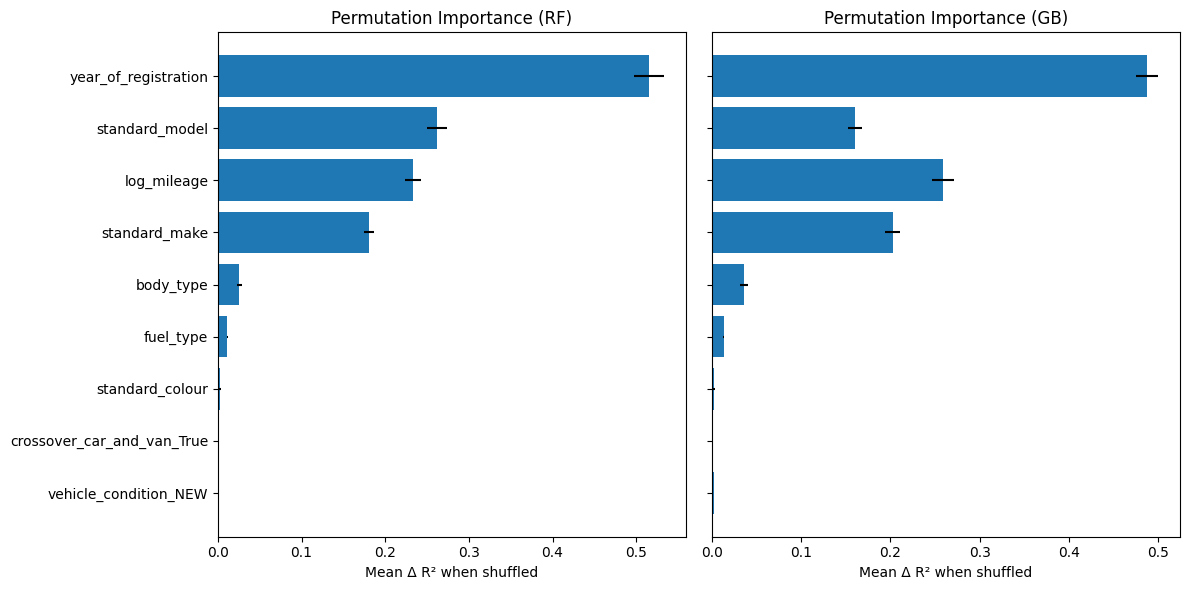

In [ ]:

# 1. Compute permutation importance on the TEST set (using R² as the metric)
pi_rf = permutation_importance(
    best_rf,
    X_test_scaled[selected_features],
    y_test,
    scoring='r2',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

pi_gb = permutation_importance(
    best_gb,
    X_test_scaled[selected_features],
    y_test,
    scoring='r2',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# 2. Build DataFrames of mean importances
feat_names = np.array(selected_features)

df_pi_rf = pd.DataFrame({
    'feature': feat_names,
    'importance': pi_rf.importances_mean,
    'std': pi_rf.importances_std
}).sort_values('importance', ascending=True)

df_pi_gb = pd.DataFrame({
    'feature': feat_names,
    'importance': pi_gb.importances_mean,
    'std': pi_gb.importances_std
}).sort_values('importance', ascending=True)

# 3. Plot side-by-side bar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Random Forest
ax1.barh(df_pi_rf['feature'], df_pi_rf['importance'], xerr=df_pi_rf['std'])
ax1.set_title("Permutation Importance (RF)")
ax1.set_xlabel("Mean Δ R² when shuffled")

# Gradient Boosting
ax2.barh(df_pi_gb['feature'], df_pi_gb['importance'], xerr=df_pi_gb['std'])
ax2.set_title("Permutation Importance (GB)")
ax2.set_xlabel("Mean Δ R² when shuffled")

plt.tight_layout()
plt.show()


In [ ]:
# https://medium.com/@anshulgoel991/model-exploitability-using-shap-shapley-additive-explanations-and-lime-local-interpretable-cb4f5594fc1a
# Global explanations are beneficial for understanding
# the general trends and insights the model has learned from the entire dataset.

In [ ]:
# LOCAL SHAP

In [ ]:
# waterfall and force plots for rfr

100%|===================| 1997/2000 [05:40<00:00]       

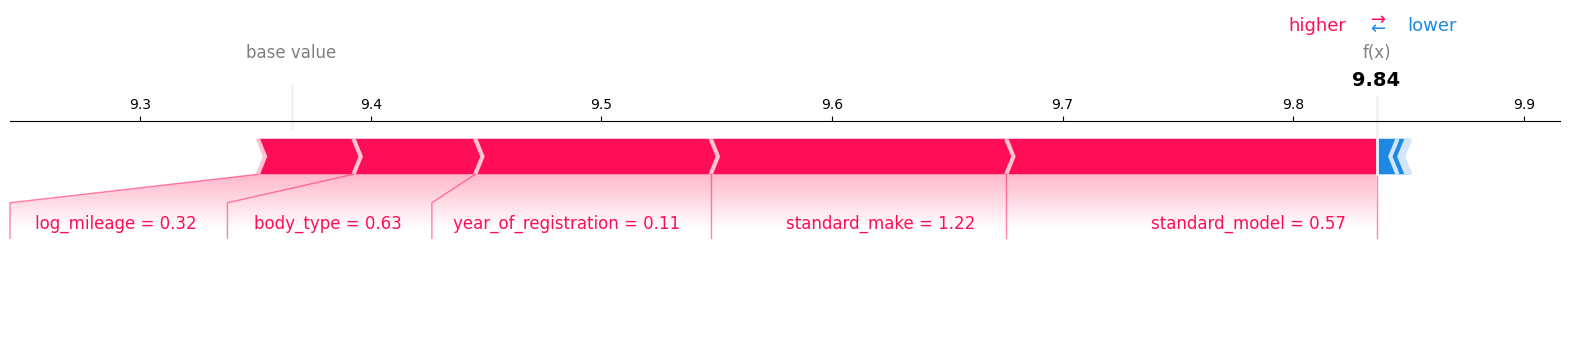

In [ ]:
i = 0  # Index of instance to explain

# Create explainer and get SHAP values
explainer_rf = shap.Explainer(best_rf, X_train_scaled[selected_features])
shap_values_rf = explainer_rf(X_test_scaled[selected_features], check_additivity=False)

# Grab the instance to explain
features = X_test_scaled[selected_features].iloc[i]
shap_vals = shap_values_rf[i].values
expected_value = explainer_rf.expected_value

# Create a Series with truncated string values
short_values = pd.Series(
    [f"{v:.2f}" for v in features],
    index=features.index
)

# Use the short_values Series as features
shap.force_plot(
    expected_value,
    shap_vals,
    short_values,
    matplotlib=True
)

100%|===================| 1996/2000 [05:22<00:00]       

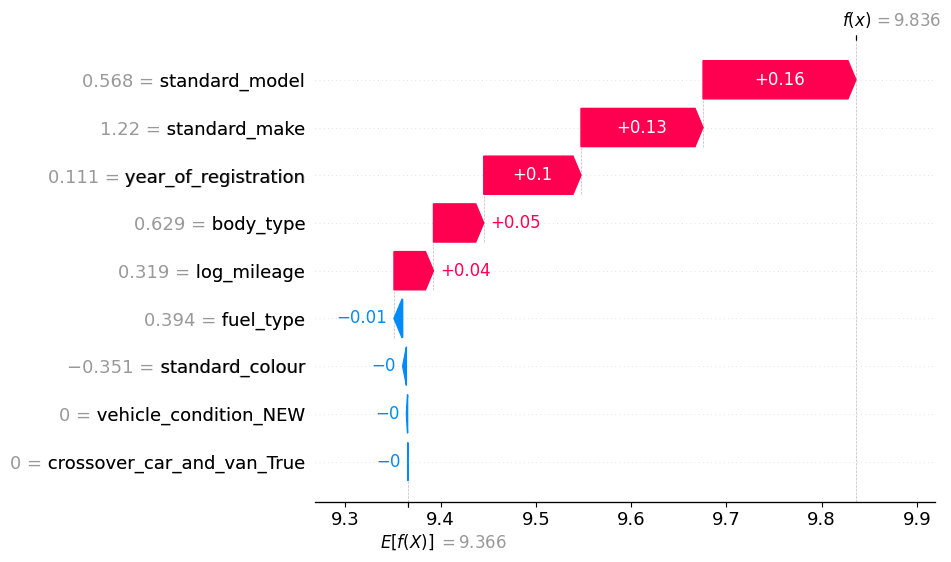

In [ ]:
# Index of the sample to explain
i = 0

# Create explainer and compute SHAP values (if not done already)
explainer_rf = shap.Explainer(best_rf, X_train_scaled[selected_features])
shap_values_rf = explainer_rf(X_test_scaled[selected_features], check_additivity=False)

# Draw waterfall plot
shap.plots.waterfall(shap_values_rf[i], max_display=10)

In [ ]:
# we do know which record it is, because you choose it
# explicitly when generating the SHAP values.

In [ ]:
# waterfall and force for gbr

 97%|=================== | 1938/2000 [00:13<00:00]       

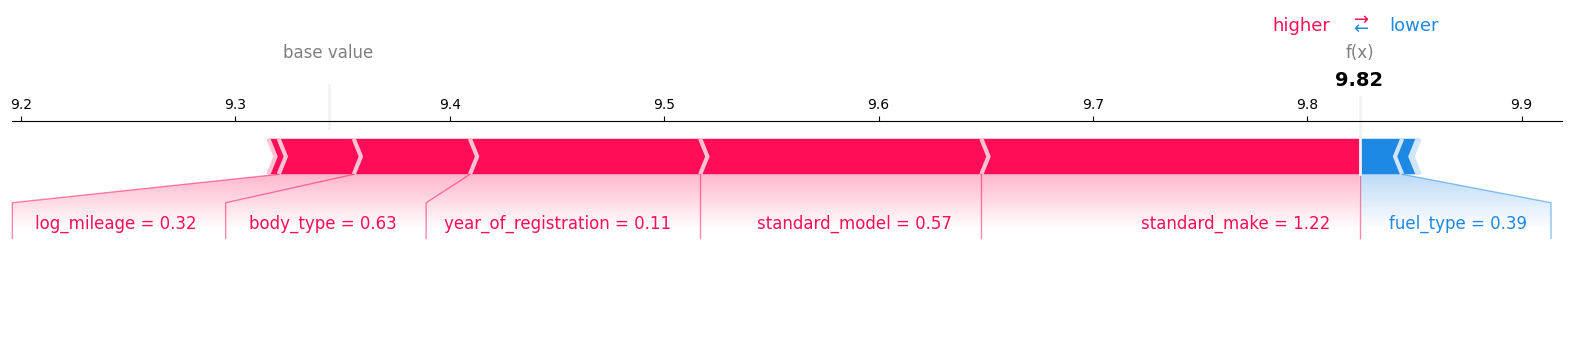

In [ ]:
import shap

i = 0  # Index of instance to explain

# Create SHAP explainer for GB and get values
explainer_gb = shap.Explainer(best_gb, X_train_scaled[selected_features])
shap_values_gb = explainer_gb(X_test_scaled[selected_features], check_additivity=False)

# Grab the instance to explain
features_gb = X_test_scaled[selected_features].iloc[i]
shap_vals_gb = shap_values_gb[i].values
expected_value_gb = explainer_gb.expected_value

# Create a Series with truncated string values
short_values_gb = pd.Series(
    [f"{v:.2f}" for v in features_gb],
    index=features_gb.index
)

# Plot force plot with truncated feature‐value labels
shap.force_plot(
    expected_value_gb,
    shap_vals_gb,
    short_values_gb,
    matplotlib=True
)


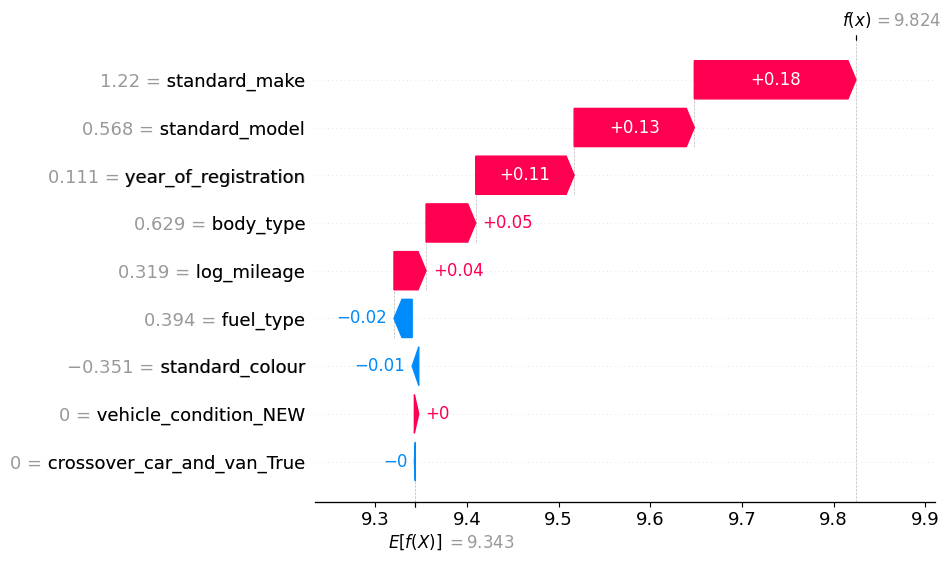

In [ ]:
# Waterfall plot (no need to round manually)
shap.plots.waterfall(shap_values_gb[i], max_display=10)

In [ ]:
# GLOBAL SHAP

100%|===================| 1996/2000 [05:21<00:00]       

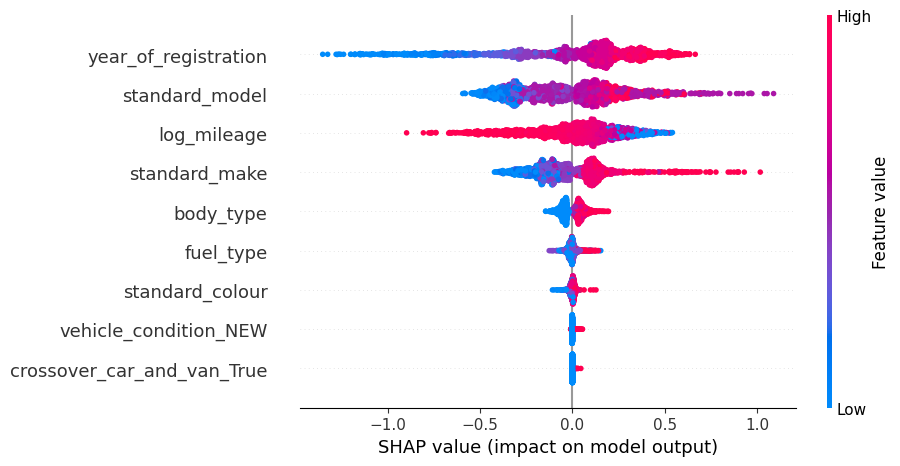

In [ ]:
# SHAP for Random Forest
explainer_rf = shap.Explainer(best_rf, X_train_scaled[selected_features])
shap_values_rf = explainer_rf(X_test_scaled[selected_features], check_additivity=False)

shap.plots.beeswarm(shap_values_rf, max_display=10)

 96%|=================== | 1922/2000 [00:13<00:00]       

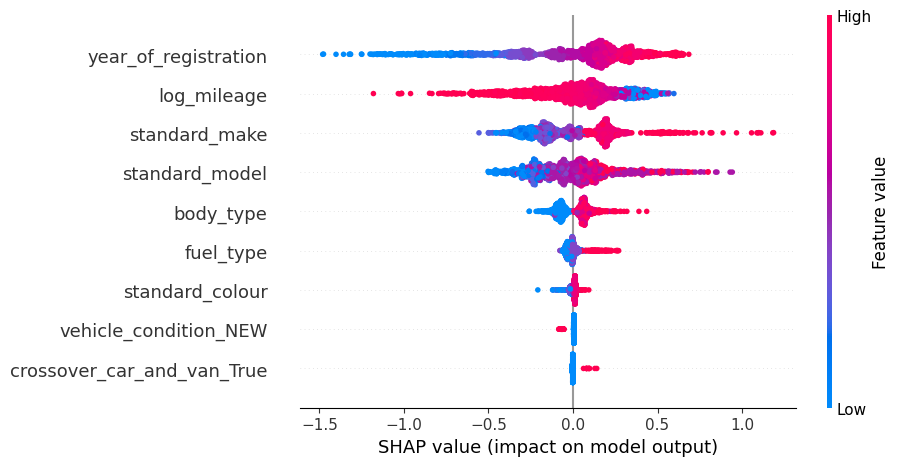

In [ ]:
# SHAP for Gradient Boosting
explainer_gb = shap.Explainer(best_gb, X_train_scaled[selected_features])
shap_values_gb = explainer_gb(X_test_scaled[selected_features], check_additivity=False)

shap.plots.beeswarm(shap_values_gb, max_display=10)

# <font face="Arial" size=4 color='#8496b3'> 6.  PDP Model Explanations  <font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
# Choose the features to visualize
pdp_features = ['log_mileage', 'year_of_registration']

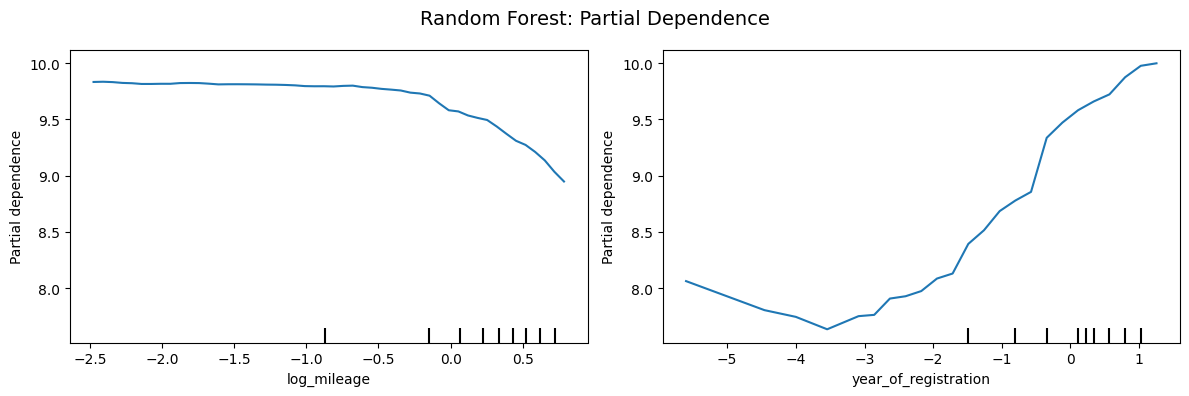

In [ ]:
# ---- PDP for Random Forest ----
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    best_rf,
    X_test_scaled[selected_features],
    pdp_features,
    ax=ax,
    kind='average',
    grid_resolution=50
)
fig.suptitle("Random Forest: Partial Dependence", fontsize=14)
plt.tight_layout()
plt.show()

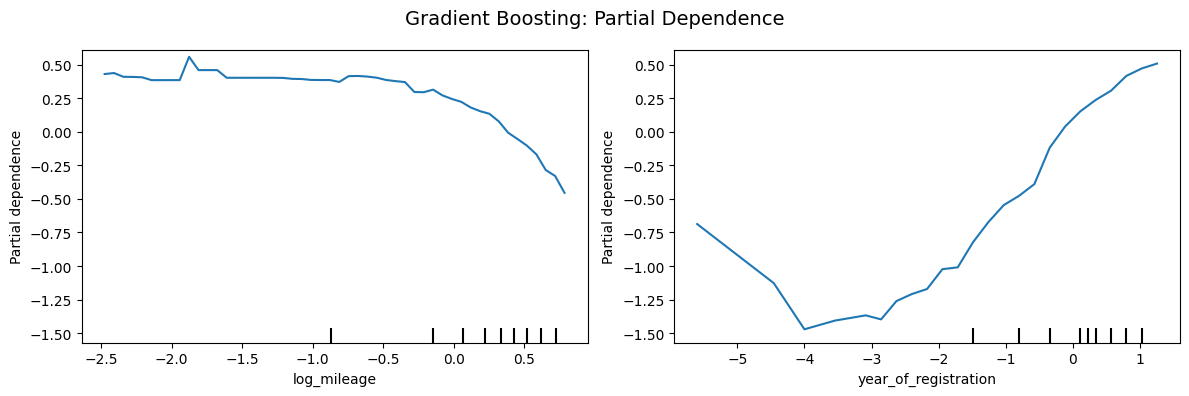

In [ ]:
# ---- PDP for Gradient Boosting ----
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    best_gb,
    X_test_scaled[selected_features],
    pdp_features,
    ax=ax,
    kind='average',
    grid_resolution=50
)
fig.suptitle("Gradient Boosting: Partial Dependence", fontsize=14)
plt.tight_layout()
plt.show()

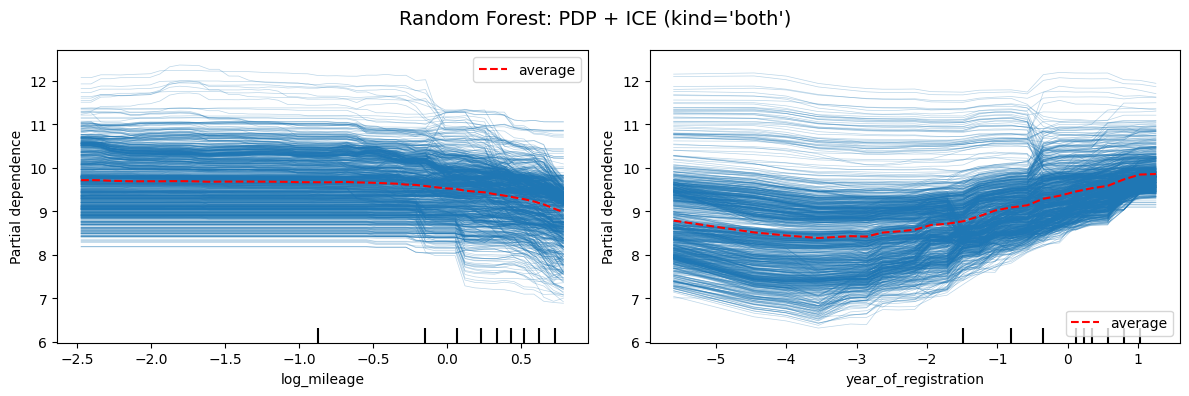

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Features for PDP + ICE
pdp_features = ['log_mileage', 'year_of_registration']

# ---- PDP + ICE for Random Forest ----
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    best_rf,
    X_test_scaled[selected_features],
    pdp_features,
    kind="both",            # show both individual curves (ICE) and average (PDP)
    ax=ax,
    grid_resolution=50,
    pd_line_kw={'color': 'red'}
)
fig.suptitle("Random Forest: PDP + ICE (kind='both')", fontsize=14)
plt.tight_layout()
plt.show()


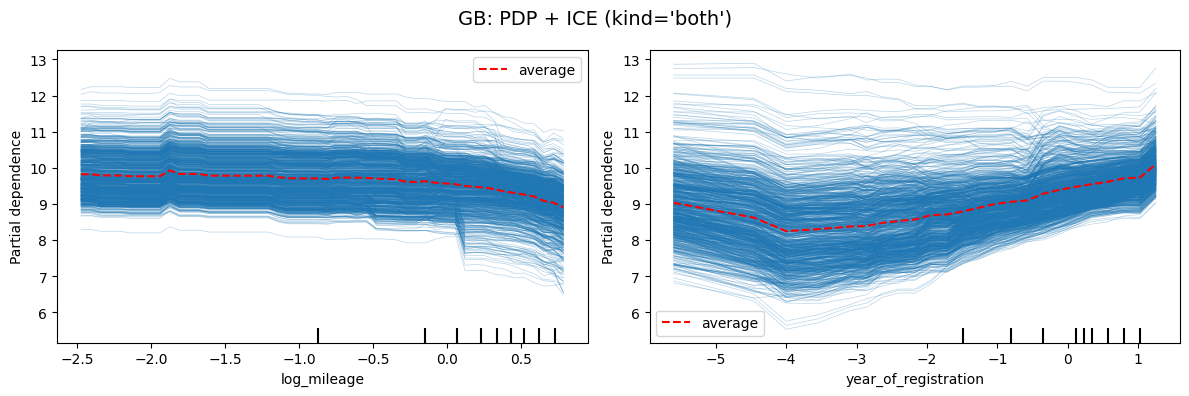

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = ['log_mileage', 'year_of_registration']

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
PartialDependenceDisplay.from_estimator(
    best_gb,
    X_test_scaled[selected_features],
    features,
    kind="both",                             # show BOTH average & individual
    ax=ax,
    grid_resolution=50,
    pd_line_kw={'color': 'red'}
)
fig.suptitle("GB: PDP + ICE (kind='both')", fontsize=14)
plt.tight_layout()
plt.show()

# <font face="Arial" size=4 color='#8496b3'> 7. Dimensionality Reduction (Linear)  <font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
from sklearn.decomposition import PCA

# 1. Fit PCA without specifying n_components to get explained variance
pca_full = PCA().fit(X_train_scaled[selected_features])
explained = pca_full.explained_variance_ratio_
cumulative = np.cumsum(explained)


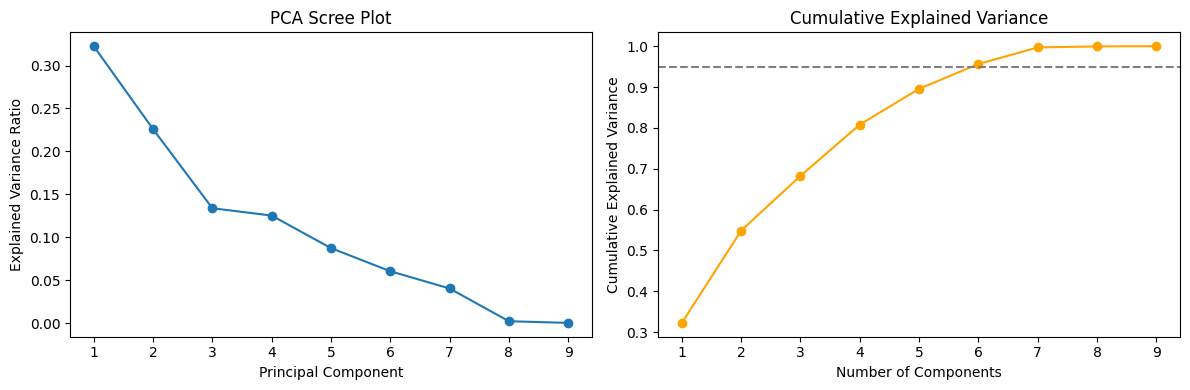

Number of components to retain ≥95% variance: 6
Linear Regression on PCA features:
 Train R²: 0.7168, Train MAE: 0.2963
 Test  R²: 0.7634, Test  MAE: 0.2905


In [ ]:
# 2. Scree plot & cumulative variance
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(np.arange(1, len(explained) + 1), explained, marker='o')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('PCA Scree Plot')

axes[1].plot(np.arange(1, len(cumulative) + 1), cumulative, marker='o', color='orange')
axes[1].axhline(0.95, linestyle='--', color='grey')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
plt.tight_layout()
plt.show()

# 3. Select number of components for 95% variance
n_components_95 = np.argmax(cumulative >= 0.95) + 1
print(f"Number of components to retain ≥95% variance: {n_components_95}")

# 4. Fit PCA with selected number of components and transform data
pca = PCA(n_components=n_components_95)
X_train_pca = pca.fit_transform(X_train_scaled[selected_features])
X_test_pca = pca.transform(X_test_scaled[selected_features])

# 5. Train and evaluate a Linear Regression on PCA features
lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

print("Linear Regression on PCA features:")
print(f" Train R²: {r2_score(y_train, y_train_pred):.4f}, Train MAE: {mean_absolute_error(y_train, y_train_pred):.4f}")
print(f" Test  R²: {r2_score(y_test, y_test_pred):.4f}, Test  MAE: {mean_absolute_error(y_test, y_test_pred):.4f}")


In [ ]:
for i, (ev, cv) in enumerate(zip(explained, cumulative), 1):
    print(f"PC{i}: {ev:.3f} (Cumulative: {cv:.3f})")

PC1: 0.323 (Cumulative: 0.323)
PC2: 0.226 (Cumulative: 0.549)
PC3: 0.134 (Cumulative: 0.683)
PC4: 0.125 (Cumulative: 0.808)
PC5: 0.088 (Cumulative: 0.896)
PC6: 0.061 (Cumulative: 0.956)
PC7: 0.041 (Cumulative: 0.997)
PC8: 0.003 (Cumulative: 0.999)
PC9: 0.001 (Cumulative: 1.000)


https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c

Ideally, you want to choose a number of components such that you can capture a high percentage of the total variance with as few components as possible, which means a simpler model and less computational expense.

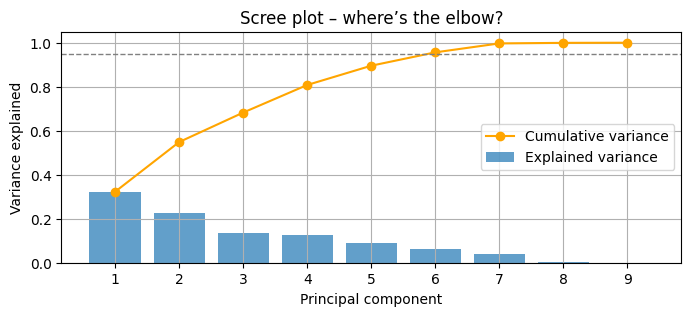

In [ ]:
n_pcs = len(explained)

plt.figure(figsize=(8, 3))
plt.bar(
    range(1, n_pcs + 1),
    explained,
    alpha=0.7,
    label='Explained variance'
)
plt.plot(
    range(1, n_pcs + 1),
    cumulative,
    'o-',
    color='orange',
    label='Cumulative variance'
)
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.title("Scree plot – where’s the elbow?")
plt.xticks(range(1, n_pcs + 1))
plt.axhline(0.95, color='grey', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Checking the impact of applying the PCA

In [ ]:
from sklearn.base import clone
# 1. Models for comparison
models = [
    ('Random Forest', best_rf),
    ('Gradient Boosting', best_gb)
]

# 2. Evaluate before and after PCA
records = []
for name, base_model in models:
    # Before PCA
    m0 = clone(base_model)
    t0 = time.time()
    m0.fit(X_train_scaled[selected_features], y_train)
    dt0 = time.time() - t0
    y_tr0 = m0.predict(X_train_scaled[selected_features])
    y_te0 = m0.predict(X_test_scaled[selected_features])
    records.append({
        'Model': name,
        'Stage': 'Before PCA',
        'Train Time (s)': dt0,
        'Train R²': r2_score(y_train, y_tr0),
        'Test R²': r2_score(y_test,  y_te0),
        'Train MAE': mean_absolute_error(y_train, y_tr0),
        'Test MAE': mean_absolute_error(y_test,  y_te0)
    })
    # After PCA
    m1 = clone(base_model)
    t1 = time.time()
    m1.fit(X_train_pca, y_train)
    dt1 = time.time() - t1
    y_tr1 = m1.predict(X_train_pca)
    y_te1 = m1.predict(X_test_pca)
    records.append({
        'Model': name,
        'Stage': 'After PCA',
        'Train Time (s)': dt1,
        'Train R²': r2_score(y_train, y_tr1),
        'Test R²': r2_score(y_test,  y_te1),
        'Train MAE': mean_absolute_error(y_train, y_tr1),
        'Test MAE': mean_absolute_error(y_test,  y_te1)
    })

# 5. Display results table
df_compare = pd.DataFrame(records).set_index(['Model', 'Stage'])
display(df_compare.round(4))

Train Time (s)  Train R²  Test R²  Train MAE  \
Model             Stage                                                      
Random Forest     Before PCA         11.1102    0.9876   0.8820     0.0652   
                  After PCA          20.1113    0.9772   0.8495     0.0862   
Gradient Boosting Before PCA          5.5924    0.9623   0.9112     0.1234   
                  After PCA           8.4442    0.9247   0.8410     0.1746   

                              Test MAE  
Model             Stage                 
Random Forest     Before PCA    0.1862  
                  After PCA     0.2311  
Gradient Boosting Before PCA    0.1705  
                  After PCA     0.2396

- Accuracy dropped significantly
- Training time increased

PCA hurt the ensemble models—both in predictive power and in training speed.

That’s because tree ensembles are already adept at handling correlated and high‐dimensional features; linearly mixing them into principal components actually distorts the splits and removes some key signals.

In [ ]:
# Prepare to collect results
records = []

# ---- Averaging Ensemble ----
# Before PCA
start = time.time()
rf_b = clone(best_rf); rf_b.fit(X_train_scaled[selected_features], y_train)
gb_b = clone(best_gb); gb_b.fit(X_train_scaled[selected_features], y_train)
time_b = time.time() - start
y_tr_avg_b = (rf_b.predict(X_train_scaled[selected_features]) +
              gb_b.predict(X_train_scaled[selected_features])) / 2
y_te_avg_b = (rf_b.predict(X_test_scaled[selected_features]) +
              gb_b.predict(X_test_scaled[selected_features])) / 2
records.append({
    'Ensemble': 'Voting',
    'Stage':    'Before PCA',
    'Train Time (s)': time_b,
    'Train R²':   r2_score(y_train, y_tr_avg_b),
    'Test R²':    r2_score(y_test,  y_te_avg_b),
    'Train MAE':  mean_absolute_error(y_train, y_tr_avg_b),
    'Test MAE':   mean_absolute_error(y_test,  y_te_avg_b)
})

# After PCA
start = time.time()
rf_a = clone(best_rf); rf_a.fit(X_train_pca, y_train)
gb_a = clone(best_gb); gb_a.fit(X_train_pca, y_train)
time_a = time.time() - start
y_tr_avg_a = (rf_a.predict(X_train_pca) + gb_a.predict(X_train_pca)) / 2
y_te_avg_a = (rf_a.predict(X_test_pca)  + gb_a.predict(X_test_pca))  / 2
records.append({
    'Ensemble': 'Voting',
    'Stage':    'After PCA',
    'Train Time (s)': time_a,
    'Train R²':   r2_score(y_train, y_tr_avg_a),
    'Test R²':    r2_score(y_test,  y_te_avg_a),
    'Train MAE':  mean_absolute_error(y_train, y_tr_avg_a),
    'Test MAE':   mean_absolute_error(y_test,  y_te_avg_a)
})

# ---- Stacking Ensemble ----
estimators = [('rf', clone(best_rf)), ('gb', clone(best_gb))]

# Before PCA
stack_b = StackingRegressor(estimators=estimators,
                            final_estimator=LinearRegression(),
                            n_jobs=-1)
start = time.time()
stack_b.fit(X_train_scaled[selected_features], y_train)
time_sb = time.time() - start
y_tr_sb = stack_b.predict(X_train_scaled[selected_features])
y_te_sb = stack_b.predict(X_test_scaled[selected_features])
records.append({
    'Ensemble': 'Stacking',
    'Stage':    'Before PCA',
    'Train Time (s)': time_sb,
    'Train R²':   r2_score(y_train, y_tr_sb),
    'Test R²':    r2_score(y_test,  y_te_sb),
    'Train MAE':  mean_absolute_error(y_train, y_tr_sb),
    'Test MAE':   mean_absolute_error(y_test,  y_te_sb)
})

# After PCA
stack_a = StackingRegressor(estimators=estimators,
                            final_estimator=LinearRegression(),
                            n_jobs=-1)
start = time.time()
stack_a.fit(X_train_pca, y_train)
time_sa = time.time() - start
y_tr_sa = stack_a.predict(X_train_pca)
y_te_sa = stack_a.predict(X_test_pca)
records.append({
    'Ensemble': 'Stacking',
    'Stage':    'After PCA',
    'Train Time (s)': time_sa,
    'Train R²':   r2_score(y_train, y_tr_sa),
    'Test R²':    r2_score(y_test,  y_te_sa),
    'Train MAE':  mean_absolute_error(y_train, y_tr_sa),
    'Test MAE':   mean_absolute_error(y_test,  y_te_sa)
})

# 3. Show comparison table
df_ensembles = pd.DataFrame(records).set_index(['Ensemble','Stage'])
display(df_ensembles.round(4))


Train Time (s)  Train R²  Test R²  Train MAE  Test MAE
Ensemble Stage                                                             
Voting   Before PCA         15.9741    0.9791   0.9030     0.0910    0.1734
         After PCA          22.6041    0.9580   0.8503     0.1279    0.2313
Stacking Before PCA         42.1814    0.9688   0.9103     0.1123    0.1703
         After PCA          88.8547    0.9697   0.8513     0.1059    0.2302

In [ ]:
# 1. Linear Regression before PCA
lr_before = LinearRegression()
start = time.time()
lr_before.fit(X_train_scaled[selected_features], y_train)
time_before = time.time() - start
y_train_pred_b = lr_before.predict(X_train_scaled[selected_features])
y_test_pred_b  = lr_before.predict(X_test_scaled[selected_features])

# 2. Linear Regression after PCA
lr_after = LinearRegression()
start = time.time()
lr_after.fit(X_train_pca, y_train)
time_after = time.time() - start
y_train_pred_a = lr_after.predict(X_train_pca)
y_test_pred_a  = lr_after.predict(X_test_pca)

# 3. Compile results
results = [
    {
        'Stage': 'Before PCA',
        'Train Time (s)': time_before,
        'Train R²': r2_score(y_train, y_train_pred_b),
        'Test R²': r2_score(y_test,  y_test_pred_b),
        'Train MAE': mean_absolute_error(y_train, y_train_pred_b),
        'Test MAE': mean_absolute_error(y_test,  y_test_pred_b)
    },
    {
        'Stage': 'After PCA',
        'Train Time (s)': time_after,
        'Train R²': r2_score(y_train, y_train_pred_a),
        'Test R²': r2_score(y_test,  y_test_pred_a),
        'Train MAE': mean_absolute_error(y_train, y_train_pred_a),
        'Test MAE': mean_absolute_error(y_test,  y_test_pred_a)
    }
]

df_lr_compare = pd.DataFrame(results).set_index('Stage')
display(df_lr_compare.round(4))

Train Time (s)  Train R²  Test R²  Train MAE  Test MAE
Stage                                                             
Before PCA          0.0064    0.7493   0.7916     0.2810    0.2758
After PCA           0.0031    0.7168   0.7634     0.2963    0.2905

# <font face="Arial" size=4 color='#8496b3'> 8. Dimensionality Reduction (Non-Linear)  <font face="Arial" size=3 color='#8496b3'> <font>

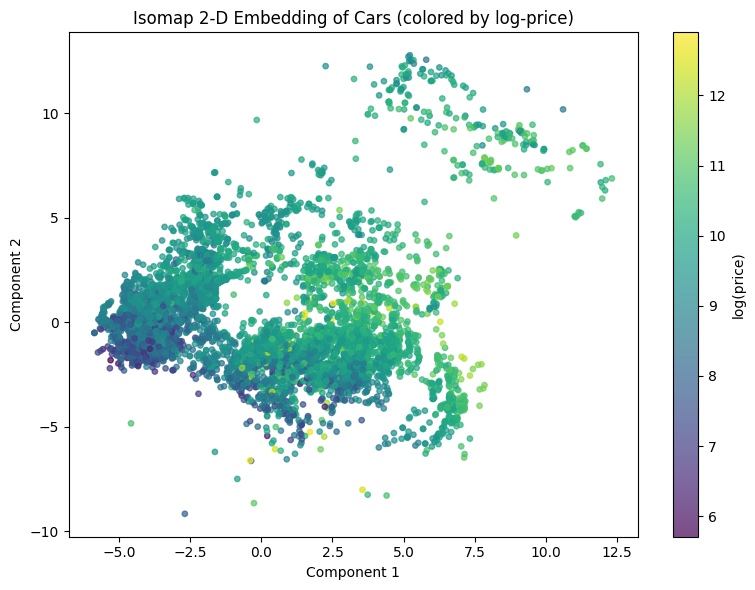

In [ ]:
# 1. Fit Isomap on the full scaled feature set
iso = Isomap(n_neighbors=10, n_components=2)
X_iso = iso.fit_transform(X_train_scaled)

# 2. Plot the 2D embedding, colored by log-price
plt.figure(figsize=(8,6))
sc = plt.scatter(
    X_iso[:,0], X_iso[:,1],
    c=y_train, cmap='viridis', s=15, alpha=0.7
)
plt.colorbar(sc, label='log(price)')
plt.title("Isomap 2-D Embedding of Cars (colored by log-price)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.show()

A few points at Component 1 ≈ 2–4 and Component 2 ≈ +10 (upper-center) are very bright yellow—these may be exceptional high-end cars (e.g. luxury vans or near-new models).

Conversely, small purple dots at Component 1 ≈ +8, Component 2 ≈ –5 suggest rare low-priced vehicles with unusual feature mixes.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.11/dist-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


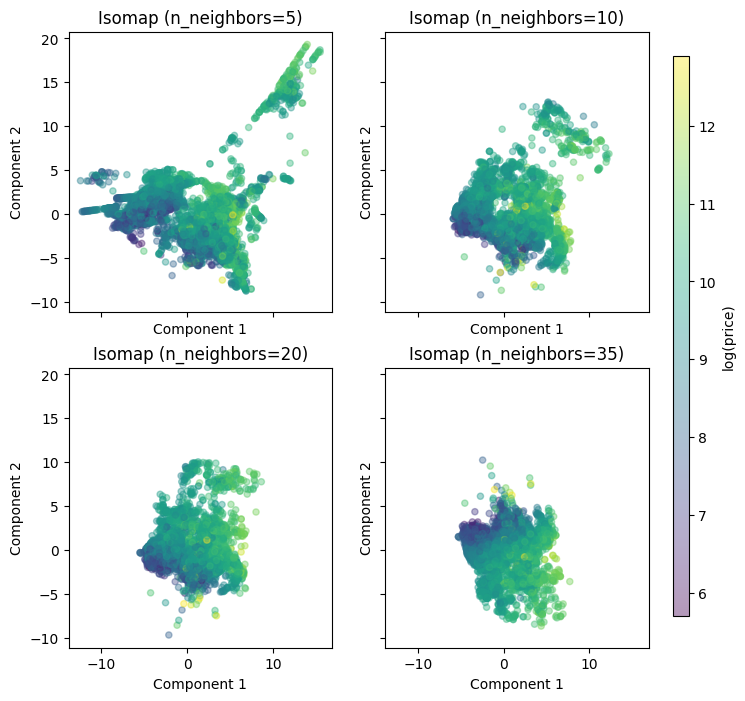

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

# Assume X_train_scaled, y_train, selected_features are defined

n_neighbors_list = [5, 10, 20, 35]
fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

for ax, n in zip(axes.flatten(), n_neighbors_list):
    iso = Isomap(n_neighbors=n, n_components=2)
    X_iso = iso.fit_transform(X_train_scaled[selected_features])

    sc = ax.scatter(
        X_iso[:, 0], X_iso[:, 1],
        c=y_train, cmap='viridis',
        s=20, alpha=0.4
    )
    ax.set_title(f"Isomap (n_neighbors={n})")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")

# make room on the right for the colorbar
fig.subplots_adjust(right=0.85)

# add an axes at [left, bottom, width, height] in figure coordinates
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(sc, cax=cbar_ax, label='log(price)')

plt.show()

1. n_neighbors = 5 (top-left)
Very local graph: Each point only “sees” its 5 nearest neighbors, so the manifold fragments into small, jagged clusters.

Disconnected islands & noise: You get streaks of points off to one side (e.g. Component1 ≈ –10 to –5, Component2 ≈ +3–5) that look like outlier groups.

Price gradient: Still roughly purple→green→yellow, but it’s noisy—local pockets of similar price are tightly packed, but global ordering is messy.

2. n_neighbors = 10 (top-right)
Balanced local/global: A good trade-off—enough connectivity to “unfold” the major curve without oversmoothing.

Cleaner shape: You see fewer disconnected clumps and a more coherent central cloud.

Smooth price ramp: The bottom-left to top-right diagonal shows a clear progression from low to high log-price.

3. n_neighbors = 20 (bottom-left)
More global smoothing: Neighborhoods span a wider region → the embedding starts to resemble a single blob with a gentle color gradient.

Less local detail: Small sub-clusters (e.g. particular make/model niches) disappear into the main mass.

Still captures price: You still see darker purples on one side and yellows on the other, but with less separation.

4. n_neighbors = 35 (bottom-right)
Almost Euclidean: With so many neighbors, Isomap’s graph distances approximate straight-line distances → it behaves more like PCA.

Collapsed manifold: The shape loses its “unfolded” character and contracts into a dense cloud.

Flattened gradient: You still see some color variation, but it’s far less directional—high-price points no longer form a clean cluster.

----------------------

Small n_neighbors preserves fine local structure—you see tight pockets of similar cars, but at the cost of global continuity.

Medium n_neighbors (≈10–20) often gives the best “unfolding”: a clear, coherent manifold where price runs smoothly along a curve.

Very large n_neighbors collapses the manifold toward a linear projection, losing both local clusters and the crisp price gradient.

# <font face="Arial" size=4 color='#8496b3'> 9. Polynomial Regression  <font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr  = lr.predict(X_test_scaled)

# 2. Polynomial Regression (degree=2)
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lr",   LinearRegression())
])
poly_model.fit(X_train_scaled, y_train)
y_train_pred_poly = poly_model.predict(X_train_scaled)
y_test_pred_poly  = poly_model.predict(X_test_scaled)

# 3. Compile results
results = pd.DataFrame([
    {
        "Model": "Linear Regression",
        "Train R²": r2_score(y_train, y_train_pred_lr),
        "Test R²":  r2_score(y_test, y_test_pred_lr),
        "Train MAE": mean_absolute_error(y_train, y_train_pred_lr),
        "Test MAE":  mean_absolute_error(y_test, y_test_pred_lr)
    },
    {
        "Model": "Polynomial Regression (deg=2)",
        "Train R²": r2_score(y_train, y_train_pred_poly),
        "Test R²":  r2_score(y_test, y_test_pred_poly),
        "Train MAE": mean_absolute_error(y_train, y_train_pred_poly),
        "Test MAE":  mean_absolute_error(y_test, y_test_pred_poly)
    }
]).set_index("Model").round(4)

results


Train R²  Test R²  Train MAE  Test MAE
Model                                                                
Linear Regression                0.7493   0.7916     0.2810    0.2758
Polynomial Regression (deg=2)    0.8219   0.8348     0.2453    0.2457

In [ ]:
# 1. Define selected features
selected_features = ['year_of_registration', 'log_mileage']

# 2. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled[selected_features], y_train)
y_train_pred_lr = lr.predict(X_train_scaled[selected_features])
y_test_pred_lr  = lr.predict(X_test_scaled[selected_features])

# 3. Polynomial Regression (degree=4)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=4, include_bias=False)),
    ("lr",   LinearRegression())
])
poly_model.fit(X_train_scaled[selected_features], y_train)
y_train_pred_poly = poly_model.predict(X_train_scaled[selected_features])
y_test_pred_poly  = poly_model.predict(X_test_scaled[selected_features])

# 4. Compile results
results = pd.DataFrame([
    {
        "Model": "Linear Regression",
        "Train R²": r2_score(y_train, y_train_pred_lr),
        "Test R²":  r2_score(y_test, y_test_pred_lr),
        "Train MAE": mean_absolute_error(y_train, y_train_pred_lr),
        "Test MAE":  mean_absolute_error(y_test, y_test_pred_lr)
    },
    {
        "Model": "Polynomial Regression (deg=2)",
        "Train R²": r2_score(y_train, y_train_pred_poly),
        "Test R²":  r2_score(y_test, y_test_pred_poly),
        "Train MAE": mean_absolute_error(y_train, y_train_pred_poly),
        "Test MAE":  mean_absolute_error(y_test, y_test_pred_poly)
    }
]).set_index("Model").round(4)

results

Train R²  Test R²  Train MAE  Test MAE
Model                                                                
Linear Regression                0.4660   0.5518     0.4585    0.4362
Polynomial Regression (deg=2)    0.5605   0.5989     0.4361    0.4164

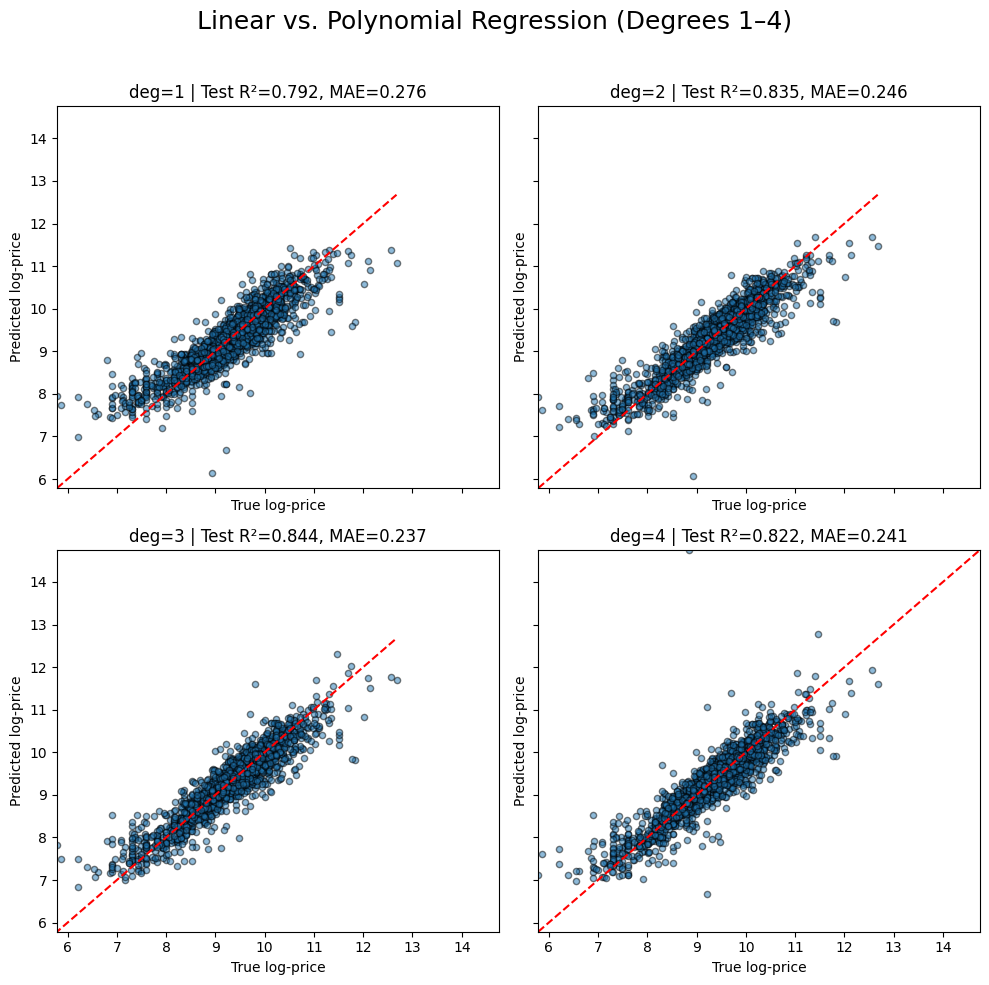

Train R²  Test R²  Train MAE  Test MAE
Degree                                        
1         0.7493   0.7916     0.2810    0.2758
2         0.8219   0.8348     0.2453    0.2457
3         0.8499   0.8437     0.2280    0.2374
4         0.8713   0.8219     0.2142    0.2406

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Degrees to compare (1 = linear)
degrees = [1, 2, 3, 4]

# Prepare subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Store metrics
metrics = []

for ax, deg in zip(axes, degrees):
    # Build pipeline: poly -> linear
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=deg, include_bias=False)),
        ("lr",   LinearRegression())
    ])
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred  = model.predict(X_test_scaled)

    # Compute metrics
    metrics.append({
        "Degree": deg,
        "Train R²":  r2_score(y_train, y_train_pred),
        "Test R²":   r2_score(y_test, y_test_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE":  mean_absolute_error(y_test, y_test_pred)
    })

    # Scatter plot: True vs Predicted
    lims = [
        min(y_test.min(), y_test_pred.min()),
        max(y_test.max(), y_test_pred.max())
    ]
    ax.scatter(y_test, y_test_pred, alpha=0.5, edgecolor='k', s=20)
    ax.plot(lims, lims, 'r--', linewidth=1.5)
    ax.set_title(f"deg={deg} | Test R²={metrics[-1]['Test R²']:.3f}, MAE={metrics[-1]['Test MAE']:.3f}")
    ax.set_xlabel("True log-price")
    ax.set_ylabel("Predicted log-price")
    ax.set_xlim(lims)
    ax.set_ylim(lims)

plt.suptitle("Linear vs. Polynomial Regression (Degrees 1–4)", fontsize=18)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

# Display metrics table
df_metrics = pd.DataFrame(metrics).set_index("Degree").round(4)
df_metrics


| Degree | Test R² | Test MAE | Visual Fit                                                                                   |
| :----: | :-----: | :------: | -------------------------------------------------------------------------------------------- |
|    1   |  0.792  |   0.276  | A “tilted” cloud—systematic under‐/over‐prediction at the extremes.                          |
|    2   |  0.835  |   0.246  | Much tighter around the 45° line, especially out in the tails—quadratic terms help a lot.    |
|    3   |  0.844  |   0.237  | Slight further gain in R² and MAE, points hug the line even closer across the full range.    |
|    4   |  0.822  |   0.241  | Performance dips a bit—overfitting to noise causes some extreme mis‐predictions to reappear. |


Big jump from deg 1 → 2

R² jumps by ~0.04, MAE drops by ~0.03.

You correct the curvature you saw in the linear fit, giving strong improvement.

Marginal gain from deg 2 → 3

A further R² bump (+0.009) and a small MAE drop (–0.009).

Third‐order interactions add some nuance, but diminishing returns.

Overfitting at deg 4

R² falls back to ~0.82, MAE creeps up.

The model is too flexible, picking up noise as “signal,” leading to wider scatter in the tails.

In [ ]:
# “Polynomial regression up to degree 3 progressively tightens fit,
# but beyond that we see overfitting; degree 2 or 3 is the sweet spot.”

# <font face="Arial" size=4 color='#8496b3'> 10. Clustering for Feature Engineering  <font face="Arial" size=3 color='#8496b3'> <font>

In [ ]:
selected_features = ['year_of_registration', 'log_mileage']

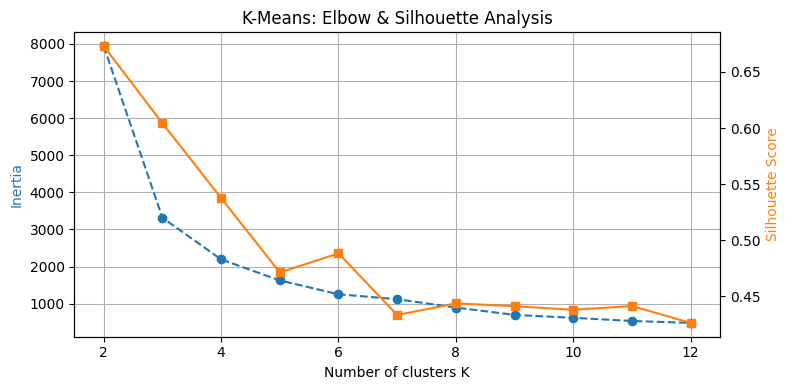

CV R² Mean  Train R²  Test R²  Train MAE  Test MAE
Model                                                             
RF w/ clusters      0.8838    0.9078   0.8878     0.1888    0.2055
GB w/ clusters      0.8935    0.9078   0.8878     0.1888    0.2055

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# 1. Determine optimal K via Elbow & Silhouette
X = X_train_scaled[selected_features]

ks = range(2, 13)
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, km.labels_))

fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()
ax1.plot(ks, inertias, 'o--', color='C0', label='Inertia')
ax2.plot(ks, sil_scores, 's-', color='C1', label='Silhouette')
ax1.set_xlabel('Number of clusters K')
ax1.set_ylabel('Inertia', color='C0')
ax2.set_ylabel('Silhouette Score', color='C1')
ax1.set_title("K-Means: Elbow & Silhouette Analysis")
ax1.grid(True)
fig.tight_layout()
plt.show()

# 2. Fit final KMeans and create cluster feature
k_opt = 5  # choose based on the elbow/silhouette
km_final = KMeans(n_clusters=k_opt, random_state=42).fit(X)
train_clusters = km_final.labels_
test_clusters  = km_final.predict(X_test_scaled[selected_features])

# 3. Augment DataFrames with cluster IDs
X_train_fe = X_train_scaled.copy()
X_test_fe  = X_test_scaled.copy()
X_train_fe['cluster_kmeans'] = train_clusters
X_test_fe['cluster_kmeans']  = test_clusters

# 4. One-hot encode cluster IDs
X_train_fe = pd.get_dummies(X_train_fe, columns=['cluster_kmeans'], prefix='cluster')
X_test_fe  = pd.get_dummies(X_test_fe,  columns=['cluster_kmeans'], prefix='cluster')

# 5. Re-evaluate RF and GB with cluster feature
models = {
    'RF w/ clusters': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=8),
    'GB w/ clusters': GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3)
}
results = []
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_fe, y_train, cv=5, scoring='r2', n_jobs=-1)
    test_score = model.fit(X_train_fe, y_train).score(X_test_fe, y_test)
    results.append({
        'Model': name,
        'CV R² Mean': cv_scores.mean(),
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²':  r2_score(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE':  mean_absolute_error(y_test, y_test_pred)
    })

results_df = pd.DataFrame(results).set_index('Model').round(4)
results_df

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# 1. Combine train & test for consistent clustering
X_full = np.vstack([
    X_train_scaled[selected_features],
    X_test_scaled[selected_features]
])

# 2. Fit DBSCAN on the full feature set
db = DBSCAN(eps=0.5, min_samples=10)
labels_full = db.fit_predict(X_full)

# 3. Split labels back into train/test
n_train = X_train_scaled.shape[0]
train_labels = labels_full[:n_train]
test_labels  = labels_full[n_train:]

# 4. Add DBSCAN cluster IDs to feature DataFrames
X_train_db = X_train_scaled.copy()
X_test_db  = X_test_scaled.copy()
X_train_db['cluster_dbscan'] = train_labels
X_test_db['cluster_dbscan']  = test_labels

# 5. One-hot encode the DBSCAN clusters
X_train_db = pd.get_dummies(X_train_db, columns=['cluster_dbscan'], prefix='db')
X_test_db  = pd.get_dummies(X_test_db,  columns=['cluster_dbscan'], prefix='db')

# 6. Align train/test columns (in case some clusters appear only in one set)
X_train_db, X_test_db = X_train_db.align(X_test_db, join='left', axis=1, fill_value=0)

# 7. Re-evaluate your tree models with DBSCAN feature
models = {
    'RF + DBSCAN': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=8),
    'GB + DBSCAN': GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=3)
}

results = []
for name, model in models.items():
    cv_r2 = cross_val_score(model, X_train_db, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
    test_r2 = model.fit(X_train_db, y_train).score(X_test_db, y_test)
    results.append({
        'Model': name,
        'CV R² Mean': cv_scores.mean(),
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²':  r2_score(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE':  mean_absolute_error(y_test, y_test_pred)
    })

results_df = pd.DataFrame(results).set_index('Model')
results_df

CV R² Mean  Train R²  Test R²  Train MAE  Test MAE
Model                                                          
RF + DBSCAN    0.893518   0.90781  0.88776     0.1888  0.205502
GB + DBSCAN    0.893518   0.90781  0.88776     0.1888  0.205502

In [ ]:
selected_features = ['year_of_registration', 'log_mileage']

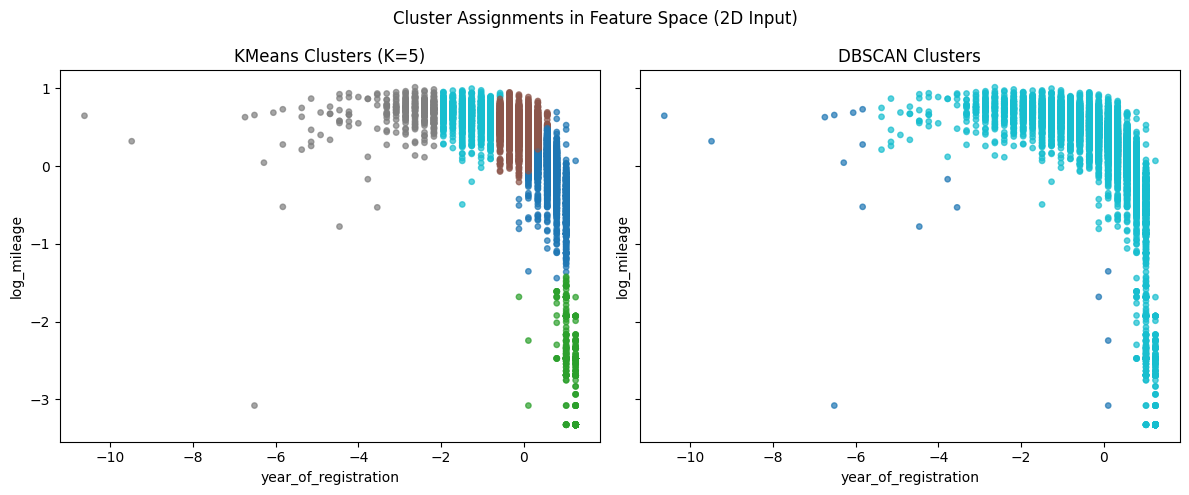

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# 1. Use only selected features (already scaled)
selected_features = ['year_of_registration', 'log_mileage']
X = X_train_scaled[selected_features]

# 2. Fit KMeans
k_opt = 5
km = KMeans(n_clusters=k_opt, random_state=42).fit(X)
labels_km = km.labels_

# 3. Fit DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels_db = db.labels_

# 4. Plot directly (since X is already 2D)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# KMeans plot
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_km, cmap='tab10', s=15, alpha=0.7)
axes[0].set_title(f"KMeans Clusters (K={k_opt})")
axes[0].set_xlabel("year_of_registration")
axes[0].set_ylabel("log_mileage")

# DBSCAN plot
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_db, cmap='tab10', s=15, alpha=0.7)
axes[1].set_title("DBSCAN Clusters")
axes[1].set_xlabel("year_of_registration")
axes[1].set_ylabel("log_mileage")

plt.suptitle("Cluster Assignments in Feature Space (2D Input)")
plt.tight_layout()
plt.show()


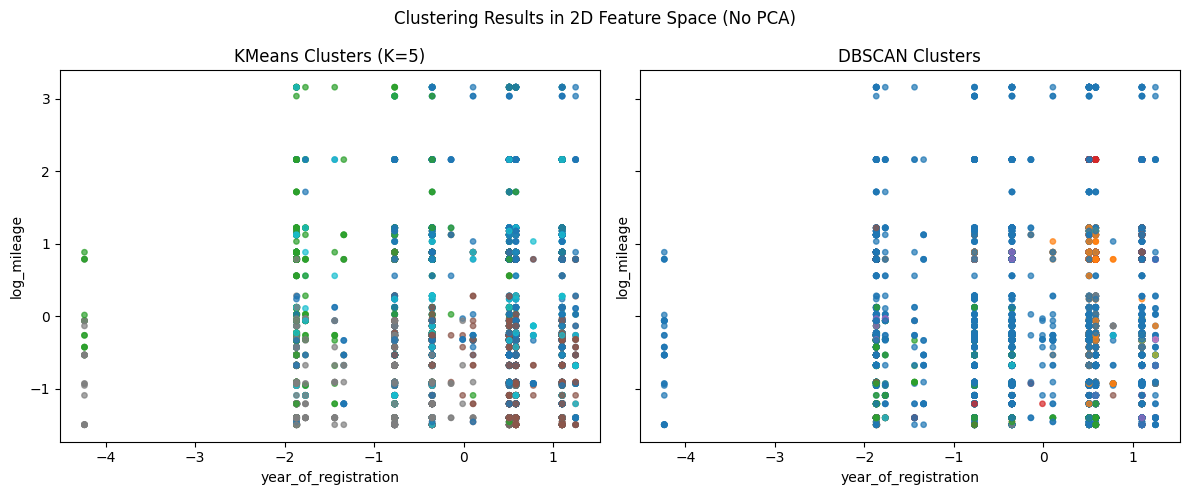

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# 1. Select two meaningful scaled features
# selected_features = ['year_of_registration', 'log_mileage']
X = X_train_scaled  # Already scaled

# 2. Fit KMeans
k_opt = 5
km = KMeans(n_clusters=k_opt, random_state=42).fit(X)
labels_km = km.labels_

# 3. Fit DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels_db = db.labels_

# 4. Plot side-by-side (2D input space)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# KMeans Clusters
axes[0].scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_km, cmap='tab10', s=15, alpha=0.7)
axes[0].set_title(f"KMeans Clusters (K={k_opt})")
axes[0].set_xlabel("year_of_registration")
axes[0].set_ylabel("log_mileage")

# DBSCAN Clusters
axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_db, cmap='tab10', s=15, alpha=0.7)
axes[1].set_title("DBSCAN Clusters")
axes[1].set_xlabel("year_of_registration")
axes[1].set_ylabel("log_mileage")

plt.suptitle("Clustering Results in 2D Feature Space (No PCA)")
plt.tight_layout()
plt.show()


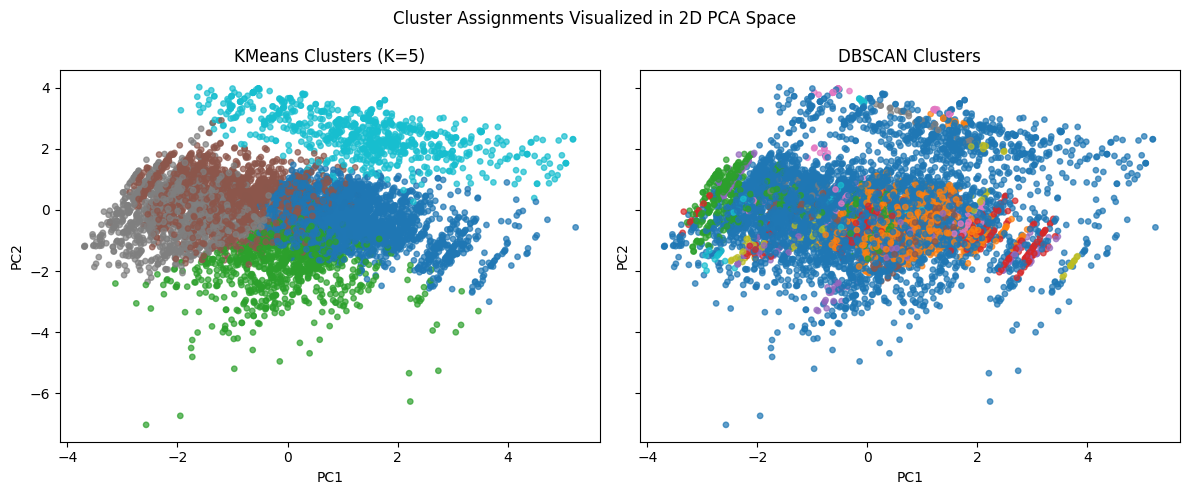

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# 1. Prepare data
X = X_train_scaled

# 2. Fit KMeans
k_opt = 5
km = KMeans(n_clusters=k_opt, random_state=42).fit(X)
labels_km = km.labels_

# 3. Fit DBSCAN
db = DBSCAN(eps=0.5, min_samples=10)
labels_db = db.fit_predict(X)

# 4. Reduce to 2D for visualization
pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X)

# 5. Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# KMeans plot
axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_km, cmap='tab10', s=15, alpha=0.7)
axes[0].set_title(f"KMeans Clusters (K={k_opt})")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# DBSCAN plot
axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=labels_db, cmap='tab10', s=15, alpha=0.7)
axes[1].set_title("DBSCAN Clusters")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.suptitle("Cluster Assignments Visualized in 2D PCA Space")
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

# 1. Prepare 3D PCA embedding
X = X_train_scaled
pca3 = PCA(n_components=3, random_state=42)
X_3d = pca3.fit_transform(X)

# 2. Fit KMeans & DBSCAN
from sklearn.cluster import KMeans, DBSCAN
km = KMeans(n_clusters=5, random_state=42).fit(X)
labels_km = km.labels_
labels_db = DBSCAN(eps=0.5, min_samples=10).fit_predict(X)

# 3. Build a DataFrame for visualization
df_vis = pd.DataFrame(X_3d, columns=['PC1','PC2','PC3'])
df_vis['KMeans'] = labels_km.astype(str)
df_vis['DBSCAN'] = labels_db.astype(str)

# 4. 3D interactive scatter for KMeans
fig_km = px.scatter_3d(
    df_vis, x='PC1', y='PC2', z='PC3',
    color='KMeans',
    title="3D PCA Visualization of KMeans Clusters",
    labels={'KMeans':'Cluster'},
    width=700, height=500
)
fig_km.update_traces(marker=dict(size=4, opacity=0.7))
fig_km.show()

# 5. 3D interactive scatter for DBSCAN
fig_db = px.scatter_3d(
    df_vis, x='PC1', y='PC2', z='PC3',
    color='DBSCAN',
    title="3D PCA Visualization of DBSCAN Clusters",
    labels={'DBSCAN':'Cluster'},
    width=700, height=500
)
fig_db.update_traces(marker=dict(size=4, opacity=0.7))
fig_db.show()
